In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
titanic=pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ==> Data Exploration

In [3]:
titanic.shape

(891, 12)

In [4]:
#Getting summary of numeric columns
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.isnull().sum()  


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

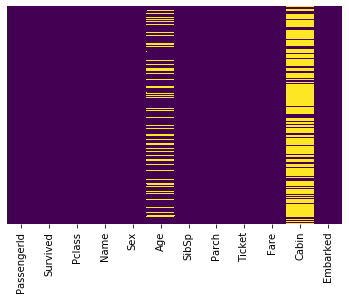

In [8]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

we can see that there are lots of missing values in  "AGE" and in "CABIN", we have to treat them

In [9]:
#Passenger Travelling FREE OF COST
titanic[titanic["Fare"]== 0].count()

PassengerId    15
Survived       15
Pclass         15
Name           15
Sex            15
Age             7
SibSp          15
Parch          15
Ticket         15
Fare           15
Cabin           3
Embarked       15
dtype: int64

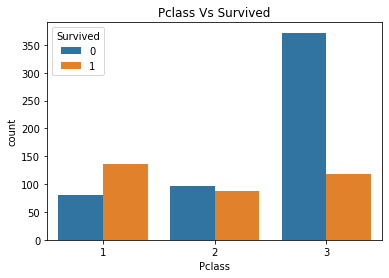

In [10]:
#Countplot

sns.countplot("Pclass",hue="Survived",data= titanic)
plt.title("Pclass Vs Survived")
plt.show()

It showa that people from HIGHEST CLASS (1ST) are more likely to survived than the people from the LOWEST CLASS(3rd)

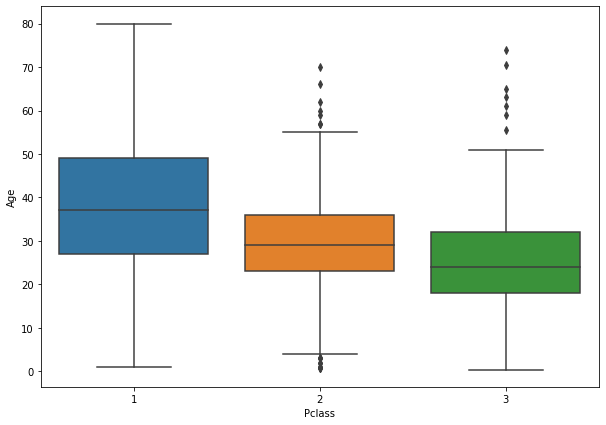

In [11]:
#Boxplot
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic)

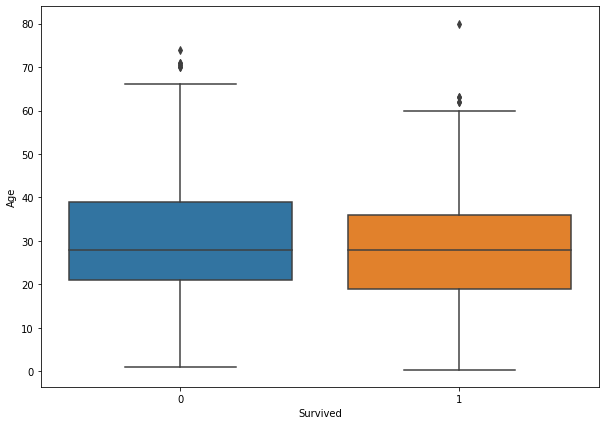

In [12]:
#To find out the OUTLIERS in particular AGE group
plt.figure(figsize=(10,7))
sns.boxplot(x='Survived',y='Age',data=titanic)

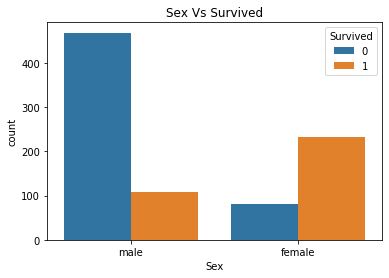

In [13]:
#Countplot
sns.countplot("Sex",hue="Survived",data= titanic)
plt.title("Sex Vs Survived")
plt.show()

It shows that the FEMALES survived are approximately twice the number of the MENS survived.

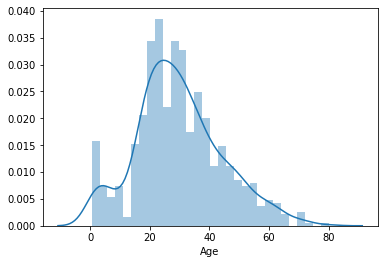

In [14]:
sns.distplot(titanic['Age'].dropna(),bins=30,)

The passenger travelling were mostly in the age of 20-35

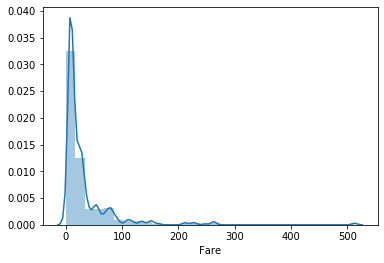

In [15]:
#To know the SKEWNESS of variable FARE==> we can see that it is Rightly skewed
sns.distplot(titanic['Fare'].dropna(),bins=30,)

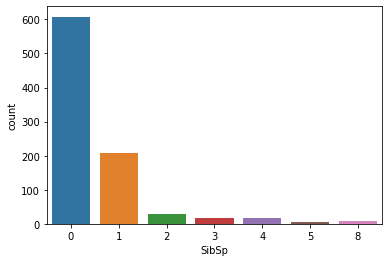

In [16]:
sns.countplot(x='SibSp',data=titanic)

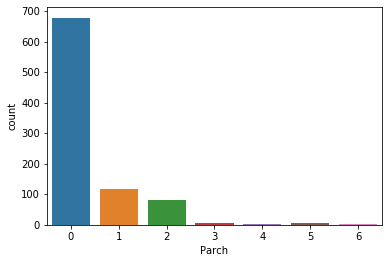

In [17]:
sns.countplot(x='Parch',data=titanic)

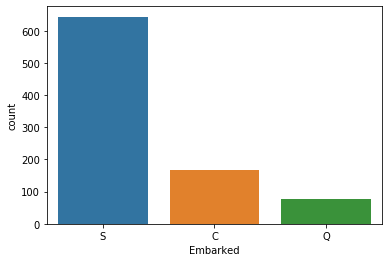

In [18]:
#To know from which port did MAXIMUM people embark
sns.countplot(x='Embarked',data=titanic)

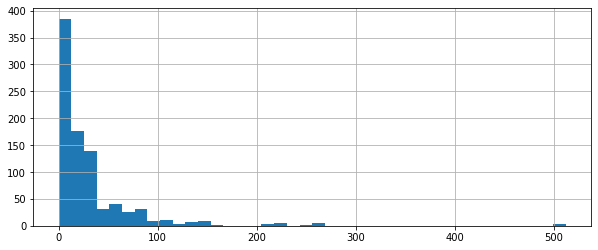

In [19]:
titanic['Fare'].hist(bins=40,figsize=(10,4))

In [20]:
#Correlation
def plot_correlation_map(titanic):
    corr=titanic.corr()
    _,ax=plt.subplots(figsize=(12,10))
    cmap=sns.diverging_palette(220,10,as_cmap=True)
    _=sns.heatmap(corr,cmap=cmap,square=True,cbar_kws={"shrink":0.9},ax=ax,annot=True,annot_kws={"fontsize":12})

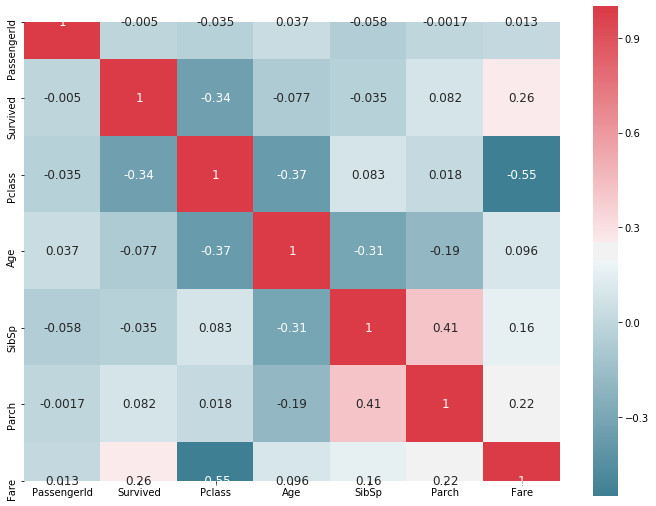

In [21]:
plot_correlation_map(titanic)

In [22]:
#To know the AVG FARE of the people who SURVIVED or not
titanic.groupby('Survived').mean()['Fare'].round()

Survived
0    22.0
1    48.0
Name: Fare, dtype: float64

# ==>Data Cleaning

Previously we have see that there were missing values in AGE,CABIN and EMBARKED we have to treat them

In [23]:
#AGE
titanic.Age.isnull().sum()

177

In [24]:
#Replacing the missing values of AGE column withe the mean with respect to the PClass

titanic.groupby('Pclass').mean()['Age'].round()

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [25]:
mean_class1 = titanic.groupby('Pclass').mean()['Age'].round().loc[1]
mean_class2 = titanic.groupby('Pclass').mean()['Age'].round().loc[2]
mean_class3 = titanic.groupby('Pclass').mean()['Age'].round().loc[3]

titanic.loc[titanic['Pclass']==1,'Age'] = titanic.loc[titanic['Pclass']==1,'Age'].fillna(value=mean_class1)
titanic.loc[titanic['Pclass']==2,'Age'] = titanic.loc[titanic['Pclass']==2,'Age'].fillna(value=mean_class2)
titanic.loc[titanic['Pclass']==3,'Age'] = titanic.loc[titanic['Pclass']==3,'Age'].fillna(value=mean_class3)

In [26]:
titanic.Age.isnull().sum()

0

In [27]:
#CABIN
titanic.Cabin.isnull().sum()

687

In [28]:
#As there are lots of missing values in the CABIN column, we will DROP it as it will mislead the model
titanic.drop('Cabin',axis=1,inplace=True)

In [29]:
#EMBARKED
titanic.dropna(inplace=True)
#Treating two missing values in this columns

In [30]:
titanic.isnull().sum()  

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All the misiing values has been treated

In [31]:
titanic["Survived"].value_counts()

0    549
1    340
Name: Survived, dtype: int64

# ==> Feature Engineering
Creating DUMMY variable of Categorical Data i.e SEX & EMBARK

In [24]:
#SEX
sex = pd.get_dummies(titanic.Sex, prefix="Sex")
print(sex.head())

   Sex_female  Sex_male
0           0         1
1           1         0
2           1         0
3           1         0
4           0         1


In [25]:
#EMBARK
embark = pd.get_dummies(titanic.Embarked, prefix="Embarked")
print(embark.head())

   Embarked_C  Embarked_Q  Embarked_S
0           0           0           1
1           1           0           0
2           0           0           1
3           0           0           1
4           0           0           1


In [26]:
titanic = pd.concat([titanic,sex,embark],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1


In [27]:
#Removing non-useful columns
titanic.drop(['PassengerId','Name','Ticket','Fare',"Sex","Embarked"],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


# Training the Model

In [28]:
#Defining DEPENDENT(y) and INDEPENDENT(X) variable
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [29]:
X.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0
2,3,26.0,0,0,1,0,0,0,1
3,1,35.0,1,0,1,0,0,0,1
4,3,35.0,0,0,0,1,0,0,1


In [30]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
#Slicing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

X_train = sc_x.fit_transform(X_train)

X_test = sc_x.transform(X_test)

In [33]:
#Implementing logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

C:\Users\umerb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred=model.predict(X_test)

# ==>Evaluating the Model

In [35]:
#Creating CONFUSION MATRIX to check the accuracy
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test,y_pred)

print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[132  25]
 [ 35  75]]


In [38]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.7752808988764045


# The Logistic Regression model build has  78% of ACCURACY